In [3]:
# Data science imports
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

# Options for pandas
pd.options.display.max_columns = 20

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from retrieval import get_data
df = get_data(fname='stats.html', processes=50)
df = df.drop(columns='text')

Found 121 entries in table.
Processed 121 articles in 4.56 seconds.


In [65]:
df_display = df.drop(columns = [c for c in df if '<tag>' in c])
df_display = df_display.drop(columns = ['days_since_publication', 
                                        'claps_per_word', 'editing_days',
                                       'title_word_count']).sort_values('published_date', ascending=False).rename(columns={'num_responses': 'responses',
                                                                                                                           'published_date': 'date'})
df_display = df_display[df_display['type'] == 'published']

In [67]:
pd.options.display.max_colwidth = 25

In [68]:
df_display.head()

claps  fans  responses           publication                date  \
10    225    57          2  Towards Data Science 2018-12-29 11:36:00   
14    353    69          3                  None 2018-12-27 12:31:00   
5     336    43          3                  None 2018-12-25 15:28:00   
17    482   142          2  Towards Data Science 2018-12-17 20:04:00   
34    802   206          4  Towards Data Science 2018-12-15 12:39:00   

    read_ratio  read_time  reads        started_date  \
10       28.74          8    250 2018-12-28 11:41:00   
14       19.53         27    190 2018-12-25 15:29:00   
5        39.06          8    266 2018-12-23 14:45:00   
17       29.58          5   1402 2018-12-17 08:43:00   
34       29.37          9   2518 2018-12-15 07:52:00   

                        tags                     title       type  views  \
10  [Science, Towards Dat...  The Copernican Princi...  published    870   
14  [Books, Reading, Educ...             Books of 2018  published    973   
5   [Education, Books, Le...    What I learned in 2018  published    681   
17  [Docker, Data Science...  Docker for Data Scien...  published   4740   
34  [Data Visualization, ...  Introduction to Inter...  published   8573   

    word_count  
10        1898  
14        7125  
5         2185  
17        1075  
34        1806

In [14]:

trace = go.Table(
header=dict(values=list(df_display.columns),
            fill = dict(color='#C2D4FF'),
            align = ['left'] * 5),
cells=dict(values=[df_display[c] for c in df_display]))

data = [trace] 
iplot(data)

In [18]:
df_display.head()

claps  fans  num_responses           publication  \
14    225    57              2  Towards Data Science   
15    353    69              3                  None   
37      0     0              0                  None   
4       6     3              0                  None   
13      0     0              0                  None   

                     published_date  read_ratio  read_time  reads  \
14 2018-12-29 11:36:17.358000-06:00   28.735632          8    250   
15 2018-12-27 12:30:46.878000-06:00   19.527235         27    190   
37 2018-12-27 07:59:59.069000-06:00    8.000000         43      2   
4  2018-12-25 21:27:02.135000-06:00   27.480916         14     36   
13 2018-12-25 21:26:27.361000-06:00   14.285714         24      1   

                       started_date  \
14 2018-12-28 11:41:21.942000-06:00   
15 2018-12-25 15:28:41.450000-06:00   
37 2018-06-10 07:20:24.669000-05:00   
4  2018-01-10 08:20:37.597000-06:00   
13 2018-01-10 08:19:51.970000-06:00   

                                                 tags  \
14  [Science, Towards Data Science, Education, Sta...   
15  [Books, Reading, Education, Writing, Self Impr...   
37  [Books, Reading, Education, Writing, Self-awar...   
4   [Data Science, Machine Learning, Education, En...   
13  [Data Science, Machine Learning, Education, En...   

                                                title  title_word_count  \
14  The Copernican Principle and How to Use Statis...                16   
15                                      Books of 2018                 3   
37                                Books of 2018 Notes                 4   
4              Building Energy Data Analysis Part One                 6   
13             Building Energy Data Analysis Part Two                 6   

         type  views  word_count  editing_days  
14  published    870        1898      0.996475  
15  published    973        7125      1.876452  
37   unlisted     25       12083    200.069148  
4    unlisted    131        3068    349.546117  
13   unlisted      7        4145    349.546243

In [17]:
trace = go.Table(columnwidth=0.2,
header=dict(values=list(df_display.columns),
            fill = dict(color='#C2D4FF'),
            align = ['left'] * 5),
cells=dict(height = 10, 
           values=[df_display[c] for c in df_display]))

data = [trace] 
iplot(data)

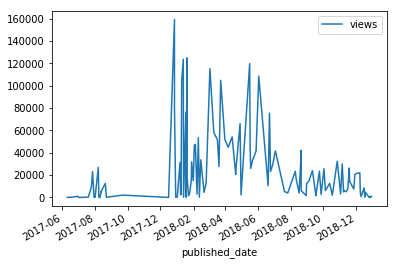

In [70]:
df.plot(x='published_date', y='views')

In [72]:
df.iplot(x='published_date', y='views', xTitle='Date', yTitle='Views', 
         text='title', title='Views over Time', mode='markers')